In [2]:
%load_ext autoreload
%autoreload 2
from symb_xai.dataset.load_mutag import load_dataset
from symb_xai.visualization.plot_mutag import get_molecule_plot_info, plot_molecule_with_relevance
# import torch
from rdkit.Chem import Draw
from rdkit import Chem

dataset_name = 'Mutagenicity'
dataset = load_dataset(dataset_name)

import pandas as pd
substructures_df = pd.read_csv('data/Mutagenicity/Mutagenicity_substructure.csv', delimiter='&')

substructures_df.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,smarts,name
0,[c][N+](=O)[O-],Specific aromatic nitro
1,[c][NH2],Specific aromatic amine
2,[c][NX2]=[OX1],Aromatic nitroso
3,[N](=O)[O]-[*],Alkyl nitrite
4,O=[N;X2]-N(-[#6])(-[#6]),Nitrosamine


In [3]:
# funcs
def get_substructure_match(molecule, substructure_smarts):
    substructure = Chem.MolFromSmarts(substructure_smarts)
    if molecule.HasSubstructMatch(substructure):
        substructure_match = molecule.GetSubstructMatch(substructure)
        return substructure_match
    else:
        return None

def plot_substructure_match(molecule, substructure_match, data=None):
    walk_rel = [[[node,node], 1] for node in substructure_match]
    if data is not None: plot_molecule_with_relevance(data, walk_rel, rel_level='walk', dataset_name='Mutagenicity', color_factor=1, legend=True, filename=None, fig_width=5)
    display(Draw.MolToImage(molecule, highlightAtoms=substructure_match))

In [11]:
i = 512

In [12]:
data = dataset[i]
plot_info = get_molecule_plot_info(data, 
                                    dataset_name=dataset_name,
                                    info_list=['pos', 'node_label_dict', 'bond_type_dict'])
molecule = plot_info['molecule']
print(molecule)
Chem.SanitizeMol(molecule)

rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_NONE

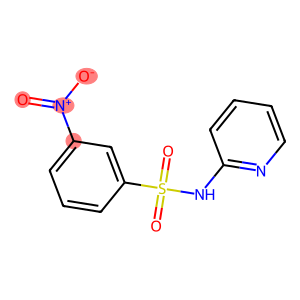

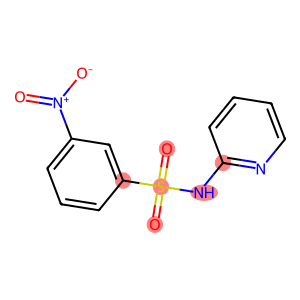

In [13]:
molecule = Chem.MolFromSmiles('c1ccc(cc1S(=O)(=O)Nc2ncccc2)[N+](=O)[O-]')

substructure_name = 'Specific aromatic nitro'
substructure_smarts = substructures_df[substructures_df['name']==substructure_name]['smarts'].values[0]
plot_substructure_match(molecule, get_substructure_match(molecule, substructure_smarts))

substructure_name = 'Sulfonamide'
substructure_smarts = substructures_df[substructures_df['name']==substructure_name]['smarts'].values[0]
plot_substructure_match(molecule, get_substructure_match(molecule, substructure_smarts))

Specific aromatic nitro [c][N+](=O)[O-]


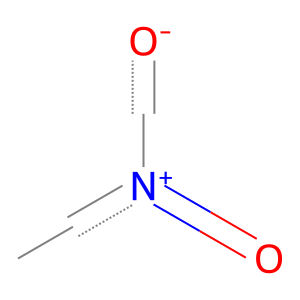

Specific aromatic amine [c][NH2]


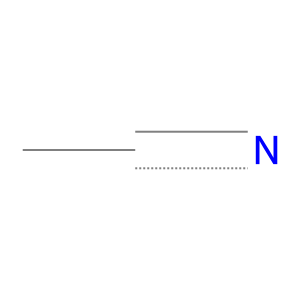

Aromatic nitroso [c][NX2]=[OX1]


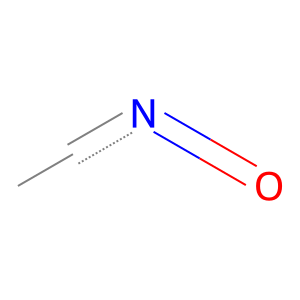

Alkyl nitrite [N](=O)[O]-[*]


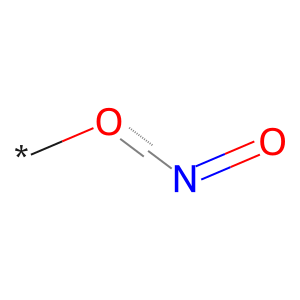

Nitrosamine O=[N;X2]-N(-[#6])(-[#6])


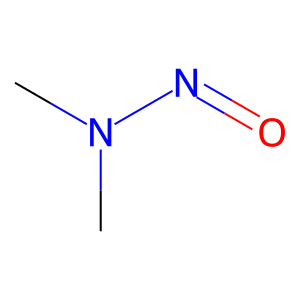

Epoxide C1OC1


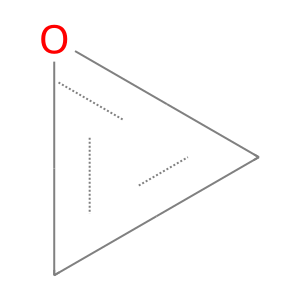

Aziridine C1NC1


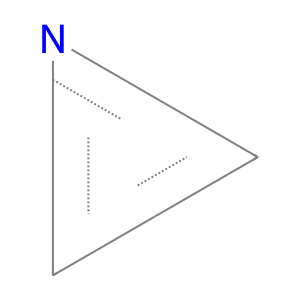

Azide [*]-[N]=[N+]=[N-]


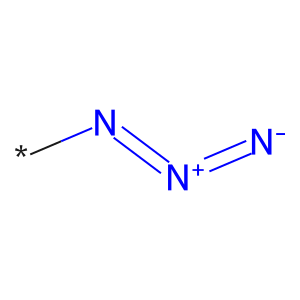

Diazo [*]-[N+]=[N-]


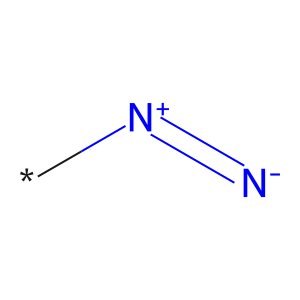

Triazene [*]-[N]=[N]-[N]-[*]


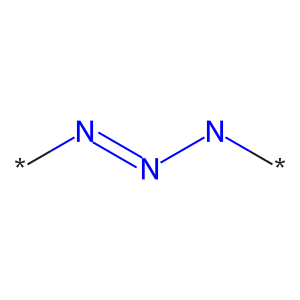

Aromatic azo [c]-N=N-[c]


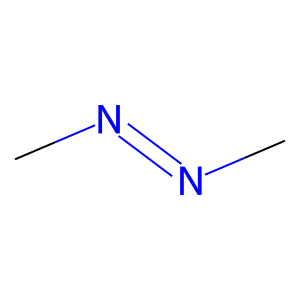

Unsubstituted heteroatom-bonded heteroatom [N,O]-[NH2,OH]


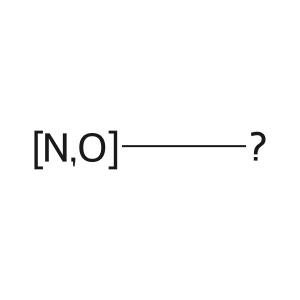

Aromatic hydroxylamine [c][NH][OH]


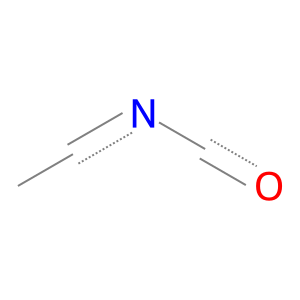

Aliphatic halide [CX4][Cl,Br,I]


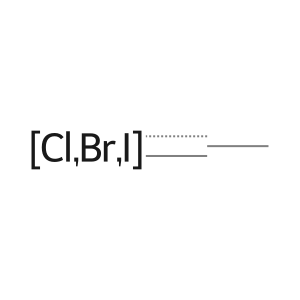

Carboxylic acid halide C(=O)[Cl,Br,I]


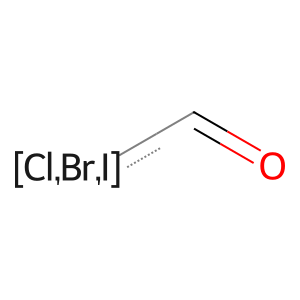

Nitrogen mustard [Cl,Br,I]CCN


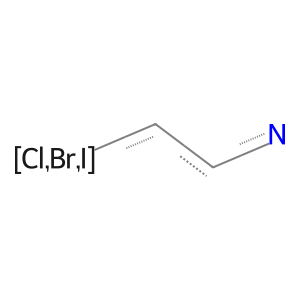

Sulfur mustard [Cl,Br,I]CCS


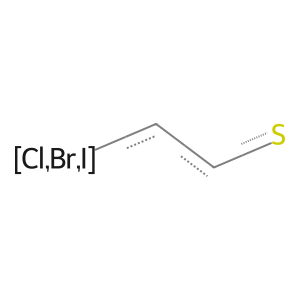

Polycyclic aromatic system [c]1[c][c][c][c][c]1[c][c][c]


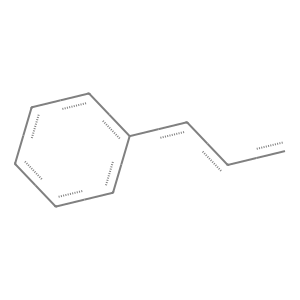

Sulfonate-bonded carbon (alkyl alkane sulfonate or dialkyl sulfate) S(=O)(=O)[O][C]


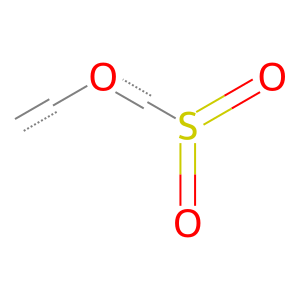

Aliphatic N-nitro [N]([C])[N+](=O)[O-]


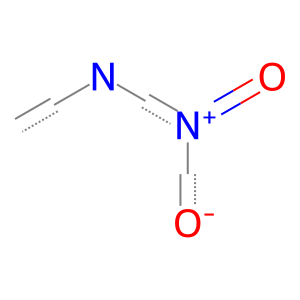

α,β-Unsaturated aldehyde (including α-carbonyl aldehyde) [CH]=[CH][CH]=O


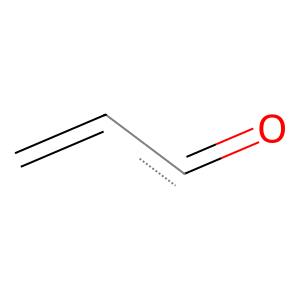

Diazonium [c][N+]#N


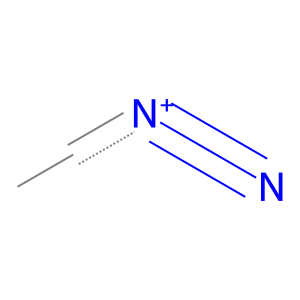

β-Propiolactone O=C1CCO1


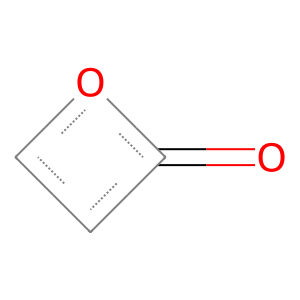

α,β-Unsaturated alkoxy group [C]=[C][O][C]


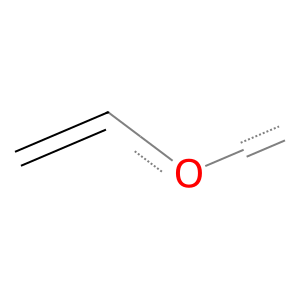

1-Aryl-2-monoalkyl hydrazine [c][NH][NH][C]


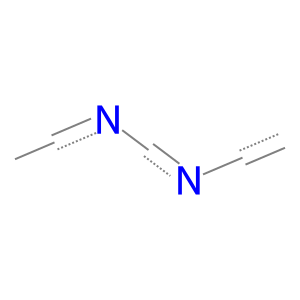

Aromatic methylamine [c][NH][CH3]


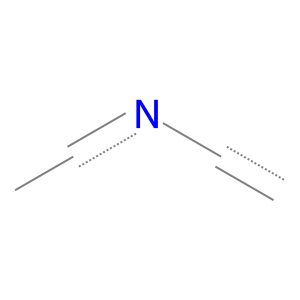

Aromatic hydroxylamine ester [c][NH][O][C](=O)


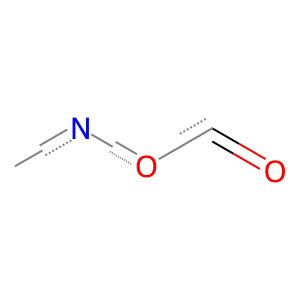

Polycyclic planar system c1ccc2c(c1)ccc3c2ccc4c3cccc4


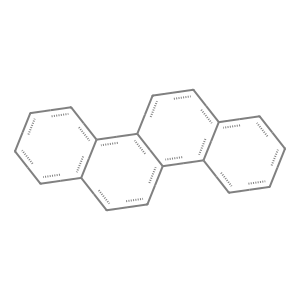

Sulfonamide [*]-S(=O)(=O)[NH]-[*]


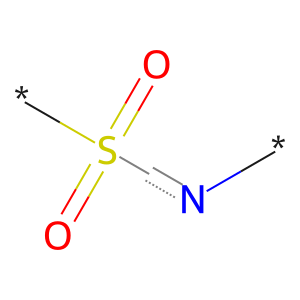

In [19]:
substructures_df = pd.read_csv('data/Mutagenicity/Mutagenicity_substructure.csv', delimiter='&')
for i in range(len(substructures_df)):
    substructure_name = substructures_df.iloc[i]['name']
    substructure_smarts = substructures_df.iloc[i]['smarts']
    print(substructure_name, substructure_smarts)
    mol_substructure = Chem.MolFromSmarts(substructure_smarts)
    display(Draw.MolToImage(mol_substructure))